<a href="https://colab.research.google.com/github/kakkadsimran-29/UNP-capstone-projects-/blob/main/GROUP_8_Wine_Quality_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## OBJECTIVE: Take the red wine dataset and predict the quality of wine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import r2_score,mean_squared_error,r2_score,mean_squared_error

STEP 1: Importing the csv file

In [ ]:
path="/content/drive/MyDrive/winequality-red.csv"
data = pd.read_csv(path, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


STEP 2: Exploring the data to see any defaults or missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.shape

(1599, 12)

In [ ]:
len(data)

1599

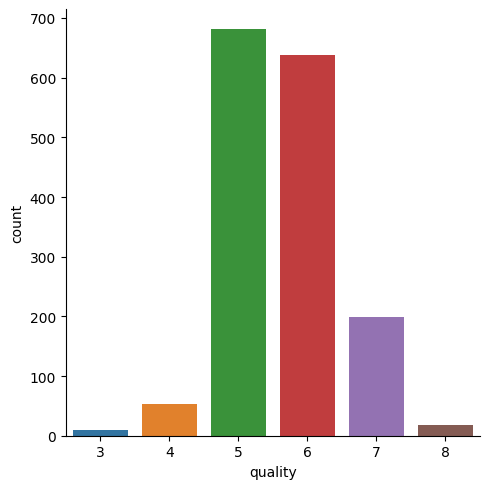

In [ ]:
sns.catplot(x = 'quality', data = data , kind = 'count')

Here with skew function we check how normally skewed is each and every column(the more it tends to 0 the more it is normally skewed)

In [ ]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

As we can see column residual sugar , chlorides and sulphates are not majorly normally skewed

In [ ]:
data['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

**Removing outliers by Inter Quartile Range method**

for column residual sugar

In [ ]:
percentile25 = data['residual sugar'].quantile(0.25)
percentile75 = data['residual sugar'].quantile(0.75)
percentile25

1.9

In [ ]:
iqr = percentile75 - percentile25
iqr

0.7000000000000002

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

3.6500000000000004
0.8499999999999996


In [ ]:
new_data = data[data['residual sugar']<upper_limit]

In [ ]:
new_data.shape

(1444, 12)

<Axes: >

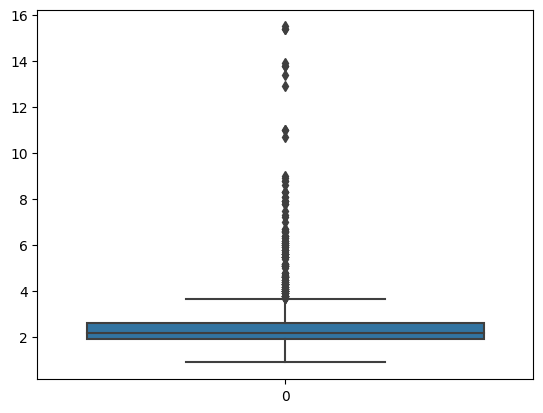

In [ ]:
sns.boxplot(data['residual sugar'])

<Axes: >

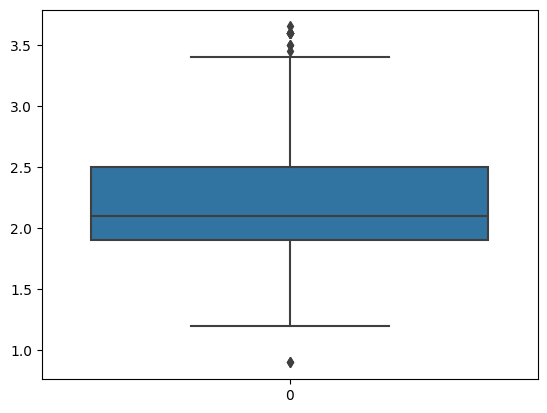

In [ ]:
sns.boxplot(new_data['residual sugar'])

for column chlorides

In [ ]:
data['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [ ]:
percentile25 = data['chlorides'].quantile(0.25)
percentile75 = data['chlorides'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
iqr

0.01999999999999999

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.11999999999999998
0.04000000000000002


In [ ]:
new_data = data[data['chlorides']<upper_limit]
new_data.shape

(1496, 12)

<Axes: >

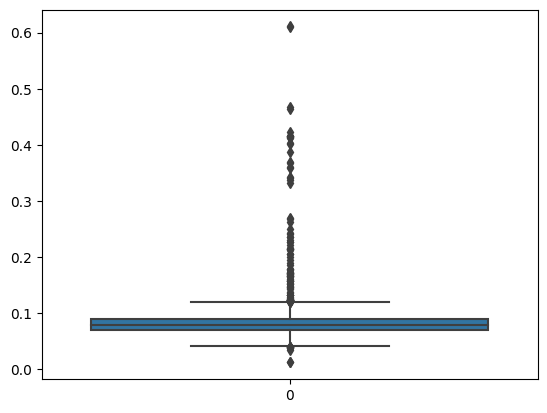

In [ ]:
sns.boxplot(data['chlorides'])

<Axes: >

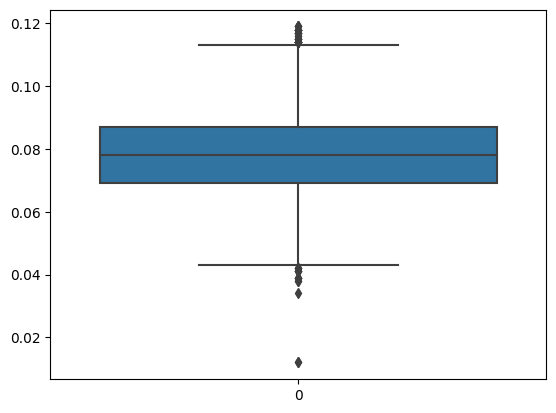

In [ ]:
sns.boxplot(new_data['chlorides'])

for column sulphates

In [ ]:
data['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [ ]:
percentile25 = data['sulphates'].quantile(0.25)
percentile75 = data['sulphates'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

0.17999999999999994

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

0.9999999999999999
0.28000000000000014


In [ ]:
new_data = data[data['sulphates']<upper_limit]
new_data.shape

(1540, 12)

<Axes: >

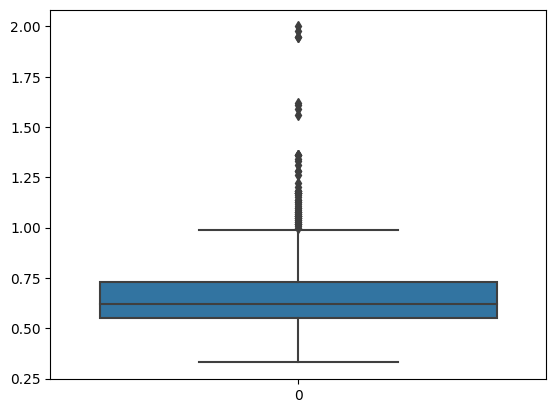

In [ ]:
sns.boxplot(data['sulphates'])

<Axes: >

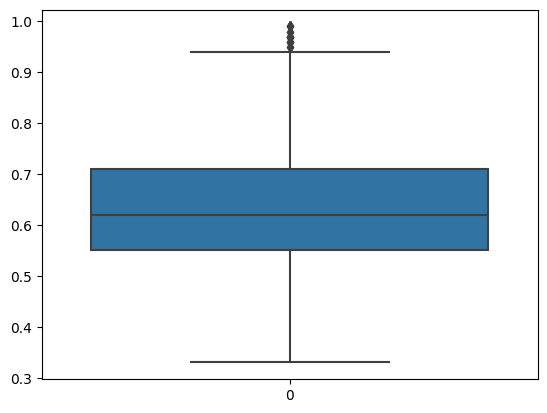

In [ ]:
sns.boxplot(new_data['sulphates'])

Above as we worked individually on each column and removed majority of the outliers

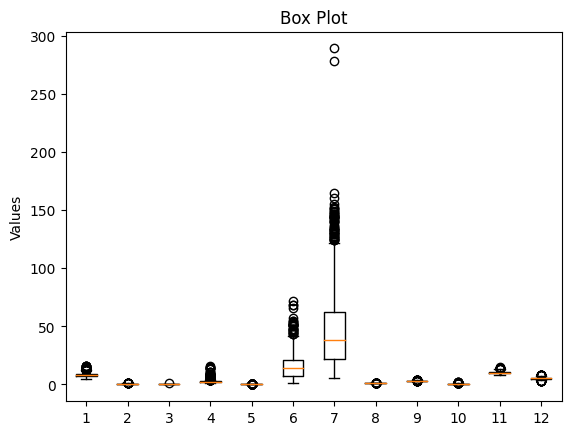

In [ ]:
plt.boxplot(data)
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

Displaying the data with the help of a histogram

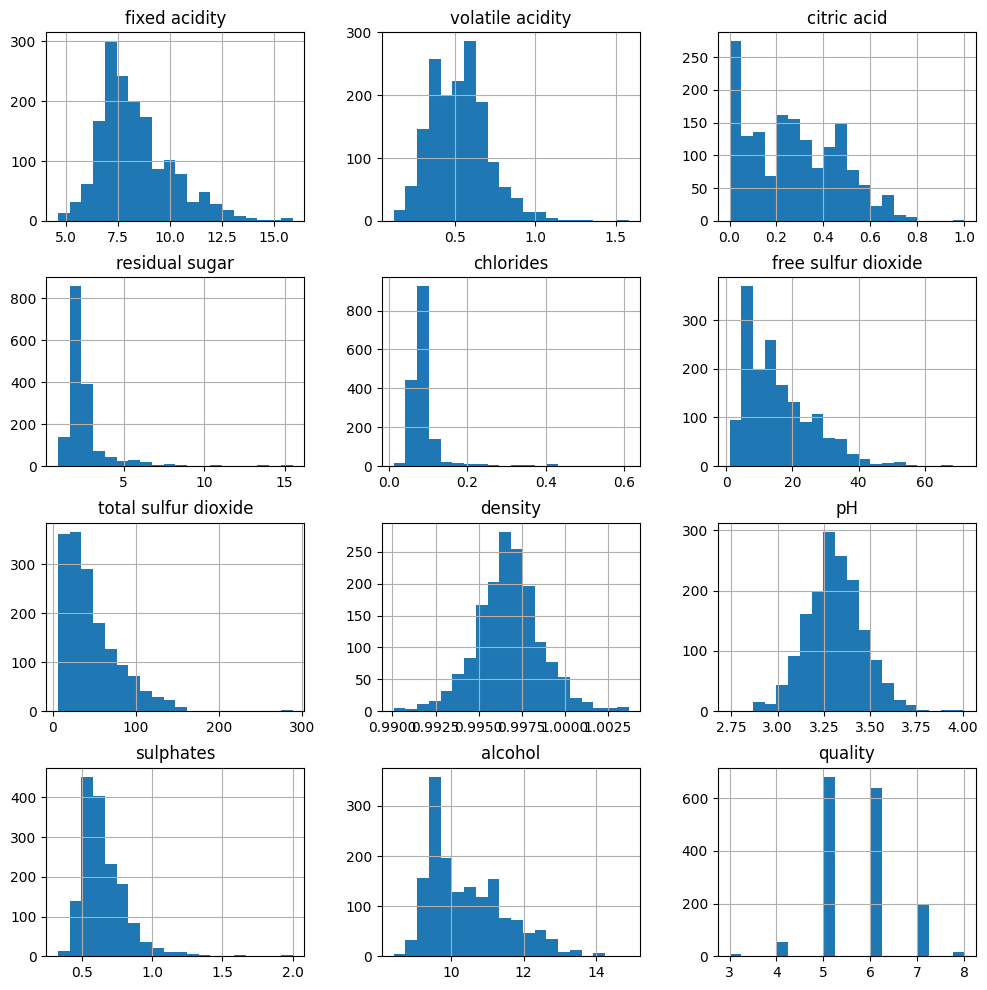

In [ ]:
data.hist(figsize=(12,12),bins=20)
plt.show()

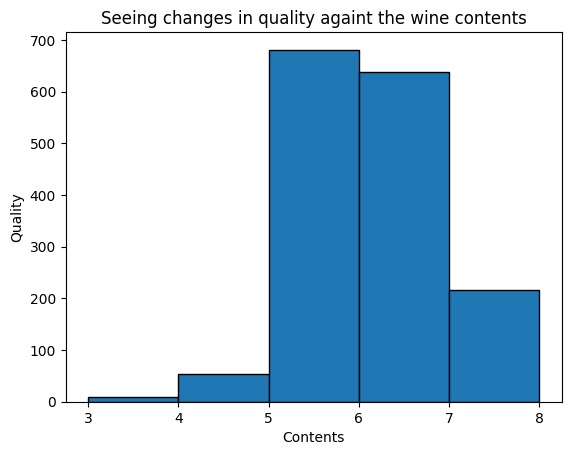

In [ ]:
Y = data.quality
X = data.drop('quality',axis=1)
plt.hist(Y, bins=5, edgecolor='black')
plt.xlabel('Contents')
plt.ylabel('Quality')
plt.title('Seeing changes in quality againt the wine contents')
plt.show()

**To check the quality of the wine with help of a bar graph**

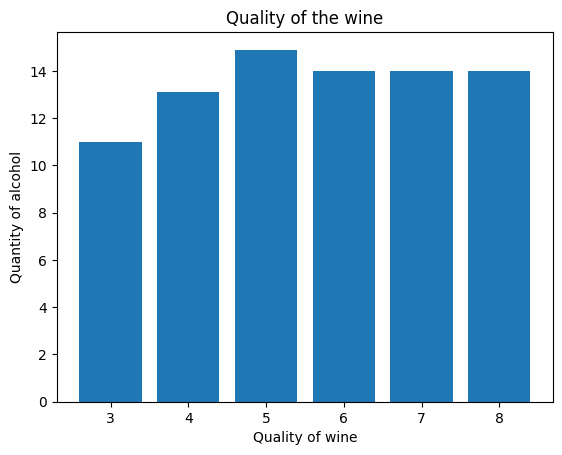

In [ ]:
Q1 = data["quality"].values
Q2 = data["alcohol"].values
plt.xlabel('Quality of wine')
plt.ylabel('Quantity of alcohol')
plt.bar(Q1,Q2)
plt.title('Quality of the wine')
plt.show()

In [ ]:
column_means = data.mean()
print("Mean of each column:")
print(column_means)

Mean of each column:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


STEP 3 : Checking the assumptions of regression

1)To check the multicollinarity between independent variables

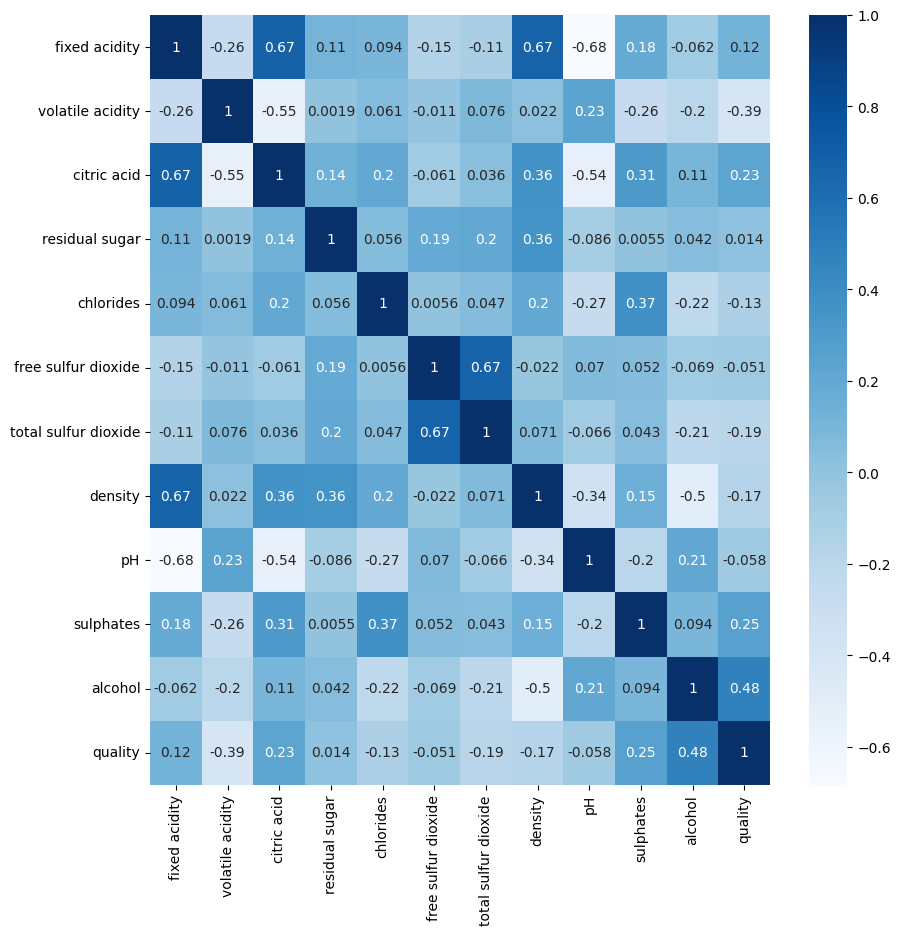

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True , cmap='Blues')
plt.show()

There is no multicolinearity present

2) To check if there is a linear relationship in the columns against the quality

Text(0.5, 1.0, 'Alcohol')

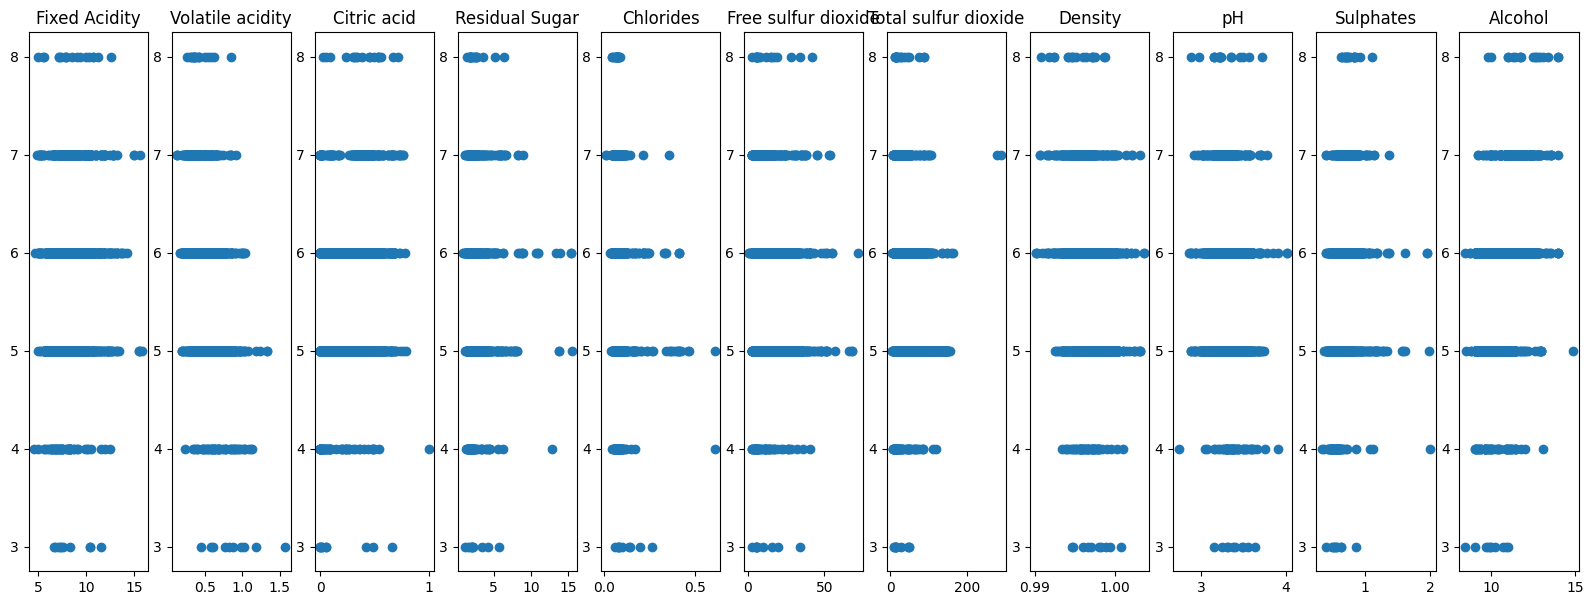

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11)= plt.subplots(ncols=11,figsize=(20,7))

ax1.scatter(data['fixed acidity'],data['quality'])
ax1.set_title("Fixed Acidity")
ax2.scatter(data['volatile acidity'],data['quality'])
ax2.set_title("Volatile acidity")
ax3.scatter(data['citric acid'],data['quality'])
ax3.set_title("Citric acid")
ax4.scatter(data['residual sugar'],data['quality'])
ax4.set_title("Residual Sugar")
ax5.scatter(data['chlorides'],data['quality'])
ax5.set_title("Chlorides")
ax6.scatter(data['free sulfur dioxide'],data['quality'])
ax6.set_title("Free sulfur dioxide")
ax7.scatter(data['total sulfur dioxide'],data['quality'])
ax7.set_title("Total sulfur dioxide")
ax8.scatter(data['density'],data['quality'])
ax8.set_title("Density")
ax9.scatter(data['pH'],data['quality'])
ax9.set_title("pH")
ax10.scatter(data['sulphates'],data['quality'])
ax10.set_title("Sulphates")
ax11.scatter(data['alcohol'],data['quality'])
ax11.set_title("Alcohol")


As we can see above there is linear relationship in the coumns against quality
.Thus the first assumption is satisfied

3)Normality of residuals

In [ ]:
Y = data.quality #dependent variable
X = data.drop('quality',axis=1) #independent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
residual = y_test - y_pred

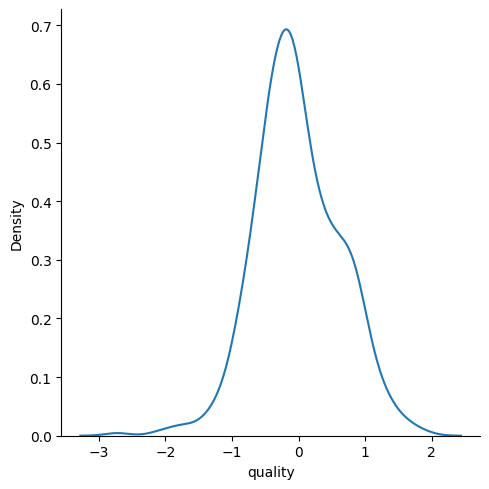

In [ ]:
sns.displot(residual,kind='kde')

From the graph we can see that the normality of the residual has been attained (i.e. the it follows normal distribution)

4)Homoscedasticity

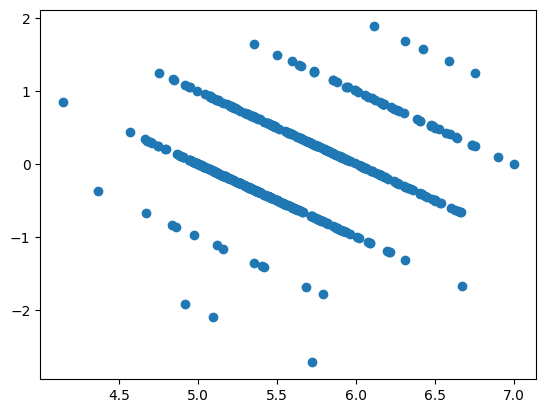

In [ ]:
plt.scatter(y_pred,residual)

5)No Autocorrelation of Error

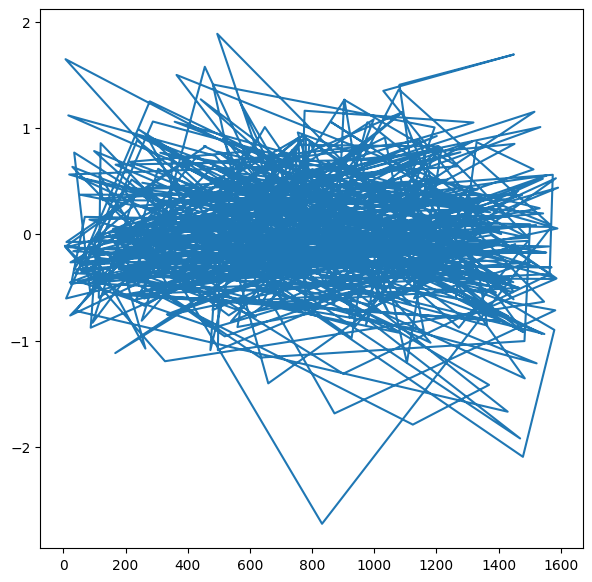

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(residual)

As we can see above that no pattern of residuals have been formed , thus there exists no autocorrelation of errors

Dividing the data into dependent and independent variable to fit in the data

In [ ]:
X = data.drop('quality',axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization:

In [ ]:
Y = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**Applying Linear Regression:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)


(1599,) (1279,) (320,)


In [ ]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(reg.intercept_)

37.80346114329764


In [ ]:
print(reg.coef_)

[ 3.82599382e-02 -1.72451012e-01  1.21607472e-01  3.11841975e-02
 -6.75218942e-01 -2.82438201e-04 -8.31753076e-04 -3.92475224e+01
  8.06682245e-02  3.32728860e-01  7.02569385e-02]


In [ ]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
147,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3
937,12.0,0.630,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8
1000,7.5,0.430,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.5
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
...,...,...,...,...,...,...,...,...,...,...,...
841,6.6,0.660,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3
889,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3
1145,8.2,0.200,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8


In [ ]:
Y_test

147     0
937     0
877     0
1000    1
73      0
       ..
841     0
889     0
1145    0
1476    0
187     0
Name: quality, Length: 320, dtype: int64

Decision Tree Regression:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
from sklearn.tree import DecisionTreeRegressor
d_reg= DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
d_reg.fit(X_train,Y_train)
pred=d_reg.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(Y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,pred))
print(mean_absolute_error(Y_test,pred))

[0.00266667 0.00266667 0.00266667 0.00266667 0.25       0.00740741
 0.00266667 0.33333333 0.02272727 0.00266667 0.00266667 0.06666667
 0.00266667 0.02941176 0.00266667 0.00740741 0.00266667 0.33333333
 0.00740741 1.         1.         1.         0.375      1.
 0.00740741 0.00266667 0.125      0.02272727 0.5        0.05
 0.04       0.00266667 0.00740741 0.00740741 0.00266667 0.13333333
 0.1        1.         0.00266667 1.         0.00266667 0.00266667
 0.02040816 0.00266667 0.01282051 0.00266667 0.02272727 0.00266667
 0.02941176 0.00266667 0.02040816 0.16666667 0.00740741 0.00740741
 0.02040816 0.16666667 0.00266667 0.00266667 0.00266667 0.00266667
 1.         0.00266667 0.16666667 1.         1.         0.00740741
 0.125      0.00266667 0.16666667 0.00266667 0.00266667 0.00266667
 0.00266667 0.5        0.00740741 0.00266667 0.00266667 1.
 0.00740741 0.02272727 0.00740741 0.375      0.0106383  0.00266667
 0.00266667 0.00266667 0.0106383  0.00266667 0.02272727 0.00266667
 0.00740741 0.002

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,Y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(Y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,pred))
print(mean_absolute_error(Y_test,pred))


[0.00666667 0.00278552 0.125      0.33333333 0.33333333 0.9
 0.03448276 0.00278552 0.33333333 0.00278552 0.00278552 0.00278552
 0.00278552 0.00278552 1.         0.03448276 0.9        0.00666667
 0.02325581 1.         0.14285714 0.00666667 1.         0.2
 0.00278552 0.00278552 0.0106383  0.00666667 0.00278552 0.02380952
 0.25       0.00278552 0.14285714 0.14285714 0.00278552 0.06666667
 0.02380952 0.0106383  0.00666667 0.00666667 0.00278552 0.00278552
 0.00278552 0.00278552 0.07692308 0.00666667 0.00666667 0.00666667
 0.00666667 0.02325581 0.00666667 0.5        0.00278552 1.
 0.04761905 0.02380952 0.00278552 1.         0.01960784 0.02380952
 0.0106383  0.04347826 0.5        0.01960784 0.00666667 0.04347826
 0.33333333 0.00278552 0.00278552 0.01960784 0.00278552 0.00278552
 1.         0.00278552 0.00666667 0.00666667 0.00666667 0.04545455
 0.2        1.         0.02380952 0.5        0.00666667 0.0106383
 0.0106383  1.         0.00278552 1.         0.00666667 0.02380952
 0.04545455 0.0769

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,Y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(Y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,pred))
print(mean_absolute_error(Y_test,pred))


[0.025      0.025      0.00257732 1.         0.05882353 0.01136364
 0.00257732 0.00257732 0.05882353 0.00257732 0.5        0.02631579
 0.03225806 0.01265823 0.03225806 0.00257732 0.05882353 0.00257732
 0.16666667 0.05882353 0.0625     0.06666667 0.05882353 0.00257732
 0.01265823 0.16666667 0.875      0.025      0.02631579 0.06666667
 0.00257732 0.025      0.02631579 0.01136364 0.01265823 0.4
 0.00257732 1.         0.00257732 0.00257732 0.14285714 0.01136364
 1.         0.01136364 0.00257732 1.         0.14285714 0.03333333
 1.         0.00257732 0.00257732 1.         0.01265823 0.2
 0.0625     0.02631579 0.03225806 0.03225806 0.0625     0.4
 0.00257732 0.05882353 0.00257732 0.025      0.00257732 0.00257732
 0.03333333 0.0625     0.00257732 0.03225806 0.01136364 0.01136364
 0.00257732 0.00257732 0.03225806 0.03225806 0.01136364 0.01265823
 0.44444444 0.0625     0.00257732 0.00257732 0.4        0.00257732
 1.         0.00257732 0.01265823 0.00257732 0.03225806 0.01136364
 0.09090909 0.02

K-Neighbors Regression:

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)
from sklearn.neighbors import KNeighborsRegressor
k_reg = KNeighborsRegressor(n_neighbors = 2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.12
Coefficient of determination: 0.06
0.15625


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35)
from sklearn.neighbors import KNeighborsRegressor
k_reg = KNeighborsRegressor(n_neighbors = 2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
print("Mean squared error: %.3f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.129
Coefficient of determination: -0.20
0.175


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4)
from sklearn.neighbors import KNeighborsRegressor
k_reg = KNeighborsRegressor(n_neighbors = 2)
k_reg.fit(X_train,Y_train)
Y_pred = k_reg.predict(X_test)
Y_pred
print("Mean squared error: %.3f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.3f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.118
Coefficient of determination: 0.045
0.15546875


Support Vector Regression:

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)
from sklearn.svm import SVR
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.12
Coefficient of determination: 0.01
0.20400196007035837


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
from sklearn.svm import SVR
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.13
Coefficient of determination: -0.01
0.2181940092169901


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.35)
from sklearn.svm import SVR
s_reg = SVR()
s_reg.fit(X_train,Y_train)
Y_pred = s_reg.predict(X_test)
Y_pred
print("Mean squared error: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

Mean squared error: 0.12
Coefficient of determination: -0.01
0.21062994077050565


Random Forest Classifier:



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation:

In [ ]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy Score :',test_accuracy)

Accuracy Score : 0.93125


In [ ]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_as_numpy_array = np.asarray(input_data) #changing the data into an array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)#reshaping the data

In [ ]:
predict = model.predict(input_data_reshape)
print(predict)
if (predict[0]==1):
  print ('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#testing the model for different set of values:
input_data1 = (1.2	,0.28	,0.56	,1.9	,0.075	,17.0	,60.0	,0.9980	,3.16	,0.58	,9.8)
input_data_as_numpy_array1 = np.asarray(input_data1)
input_data_reshaped = input_data_as_numpy_array1.reshape(1,-1)
predict1 = model.predict(input_data_reshaped)
print(predict1)
if (predict1[0]==1):
   print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


As we can see we have built an efficient wine quality prediction model